<a href="https://colab.research.google.com/github/talalba/ML_exercises-/blob/master/prob3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.model_selection import train_test_split
import numpy as np
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import KFold
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip
from numpy.linalg import norm
from numpy import dot
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [279]:
data_path = '/content/drive/My Drive/exercise/'

# load the data
data = pd.read_csv(data_path+'adult-modified.csv',sep=',')
display(data)

print(data.dtypes)

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38,Private,10,Married,White,Male,60,>50K
9996,25,Private,9,Single,White,Female,8,<=50K
9997,21,Private,10,Single,Black,Male,40,<=50K
9998,?,Private,2,Married,White,Male,53,<=50K


age               object
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object


In [280]:
# data preprocessing

# convert age to numeric

# # convert ? to na
data.age = data.age.replace('?',0)
data.age = data.age.astype(np.int64)
data['age']=data.age.mask(data.age == 0,data.age.mean())


# data['age'].value_counts()

# impute for numerical data
data['education'].fillna((data['education'].mean()), inplace=True)
data['hours-per-week'].fillna((data['hours-per-week'].mean()), inplace=True)
data['age'].fillna((data['age'].mean()), inplace=True)

# remove missing values for categorical data
data = data.dropna()

# check misisng values
print(data.isna().sum())

display(data)

age               0
workclass         0
education         0
marital-status    0
race              0
sex               0
hours-per-week    0
income            0
dtype: int64


,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0000,Public,13,Single,White,Male,40,<=50K
1,50.0000,Self-emp,13,Married,White,Male,13,<=50K
2,38.0000,Private,9,Single,White,Male,40,<=50K
3,53.0000,Private,7,Married,Black,Male,40,<=50K
4,28.0000,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9995,38.0000,Private,10,Married,White,Male,60,>50K
9996,25.0000,Private,9,Single,White,Female,8,<=50K
9997,21.0000,Private,10,Single,Black,Male,40,<=50K
9998,37.6885,Private,2,Married,White,Male,53,<=50K


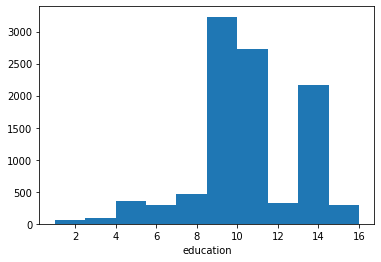

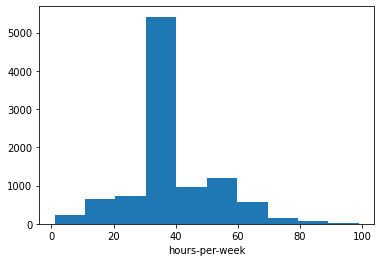

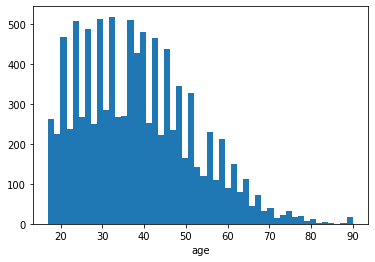

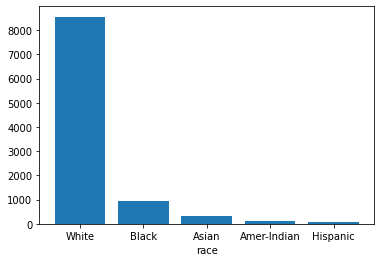

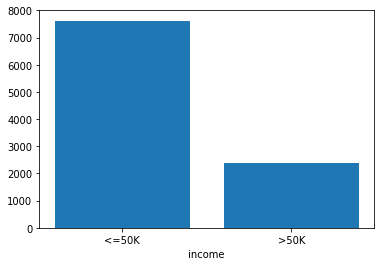

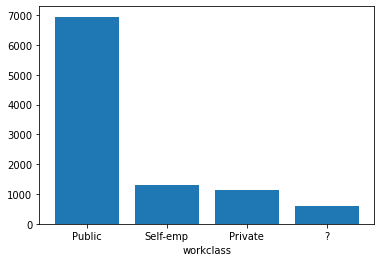

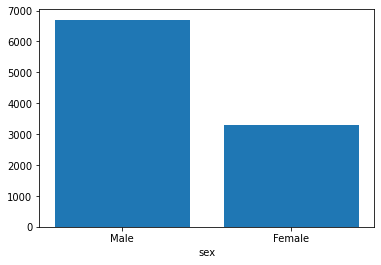

In [281]:
# display stats
plt.hist(data['education'])
plt.xlabel('education')
plt.show()

plt.hist(data['hours-per-week'])
plt.xlabel('hours-per-week')
plt.show()


plt.hist(data['age'],50)
plt.xlabel('age')
plt.show()

plt.bar(data['race'].unique(),data['race'].value_counts())
plt.xlabel('race')
plt.show()

plt.bar(data['income'].unique(),data['income'].value_counts())
plt.xlabel('income')
plt.show()

plt.bar(data['workclass'].unique(),data['workclass'].value_counts())
plt.xlabel('workclass')
plt.show()


plt.bar(data['sex'].unique(),data['sex'].value_counts())
plt.xlabel('sex')
plt.show()


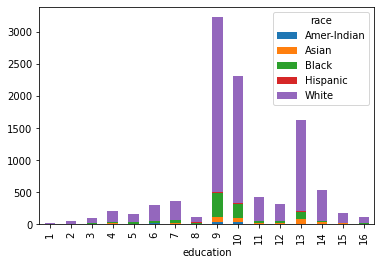

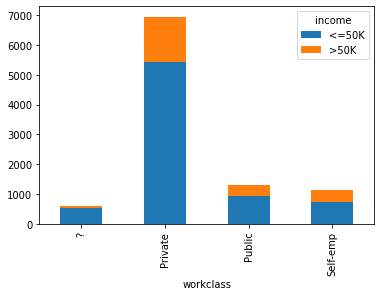

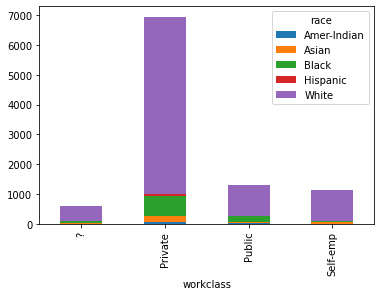

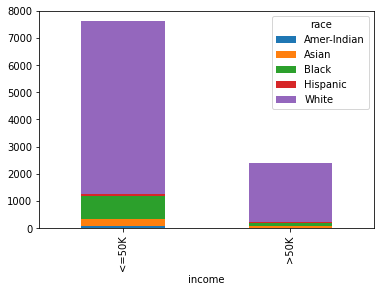

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,1.167826,3.162315,10.917202,1.010366,83.742291
>50K,0.420345,2.858344,5.086171,0.252207,91.382934


In [282]:
# cross tabulations
ct = pd.crosstab(data.education,data.race)
ct.plot.bar(stacked=True)
plt.show()



ct = pd.crosstab(data.workclass,data.income)
ct.plot.bar(stacked=True)
plt.show()


ct = pd.crosstab(data.workclass,data.race)
ct.plot.bar(stacked=True)
plt.show()



ct = pd.crosstab(data.income,data.race)
ct.plot.bar(stacked=True)
plt.show()



# cross tabe with percentages for low income group
display(pd.crosstab(data.income, data.race).apply(lambda r: r/r.sum()*100, axis=1))

# blacks formualte the majority of the low income group after white, whites have roughly the same percent in the low and high income group



In [283]:
# create dummy variables
lb_make = LabelEncoder()
data["income"] = lb_make.fit_transform(data["income"])
data["workclass"] = lb_make.fit_transform(data["workclass"])
data["marital-status"] = lb_make.fit_transform(data["marital-status"])
data["sex"] = lb_make.fit_transform(data["sex"])
data["race"] = lb_make.fit_transform(data["sex"])

display(data)
display(data.dtypes)

# define train data and labels
train_data = data.drop('income',axis=1)
labels = data['income']

print(labels.value_counts())


,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0000,2,13,1,1,1,40,0
1,50.0000,3,13,0,1,1,13,0
2,38.0000,1,9,1,1,1,40,0
3,53.0000,1,7,0,1,1,40,0
4,28.0000,1,13,0,0,0,40,0
...,...,...,...,...,...,...,...,...
9995,38.0000,1,10,0,1,1,60,1
9996,25.0000,1,9,1,0,0,8,0
9997,21.0000,1,10,1,1,1,40,0
9998,37.6885,1,2,0,1,1,53,0


age               float64
workclass           int64
education           int64
marital-status      int64
race                int64
sex                 int64
hours-per-week      int64
income              int64
dtype: object

0    7621
1    2379
Name: income, dtype: int64


In [293]:
# perform modeling 
kf = KFold(n_splits=10)

X = np.array(train_data)
Y = np.array(labels)


# sklearn cross valiadtion module is deprecated so using traintest split
# naive bayes
gnb = GaussianNB()
acc_gnb = cross_val_score(gnb, X, Y, cv=10)

print("mean_accuracy_gnb = "+ round(np.mean(acc_gnb),2).astype(str))

# decison tree
dt = DecisionTreeClassifier(criterion='entropy')
acc_dt = cross_val_score(dt, X, Y, cv=10)

print("mean_accuracy_decison_tree = "+ round(np.mean(acc_dt),2).astype(str))

# lda
lda_clf = LDA()
acc_lda = cross_val_score(lda_clf, X, Y, cv=10)

print("mean_accuracy_lda = "+ round(np.mean(acc_lda),2).astype(str))



mean_accuracy_gnb = 0.77
mean_accuracy_decison_tree = 0.78
mean_accuracy_lda = 0.81


[Text(196.14201861019868, 213.93290322580646, 'X[3] <= 0.5\nentropy = 0.792\nsamples = 10000\nvalue = [7621, 2379]'),
 Text(109.86700490761969, 206.91870967741934, 'X[2] <= 11.5\nentropy = 0.978\nsamples = 4983\nvalue = [2921, 2062]'),
 Text(27.191919635304608, 199.90451612903226, 'X[2] <= 8.5\nentropy = 0.878\nsamples = 3417\nvalue = [2401, 1016]'),
 Text(4.532781787895614, 192.89032258064515, 'X[6] <= 39.5\nentropy = 0.478\nsamples = 602\nvalue = [540, 62]'),
 Text(1.0905941143808995, 185.87612903225806, 'X[6] <= 19.5\nentropy = 0.188\nsamples = 139\nvalue = [135, 4]'),
 Text(0.8923042754025542, 178.86193548387098, 'entropy = 0.0\nsamples = 44\nvalue = [44, 0]'),
 Text(1.2888839533592449, 178.86193548387098, 'X[0] <= 45.5\nentropy = 0.252\nsamples = 95\nvalue = [91, 4]'),
 Text(1.0905941143808995, 171.84774193548387, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(1.4871737923375903, 171.84774193548387, 'X[5] <= 0.5\nentropy = 0.349\nsamples = 61\nvalue = [57, 4]'),
 Text(1.28

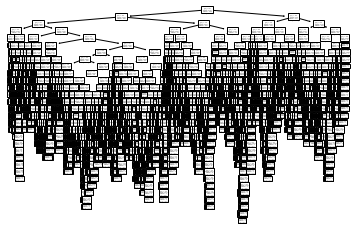

In [299]:
# generate tree 
from sklearn import tree
tree.plot_tree(dt.fit(X, Y)) 

import graphviz 
dot_data = tree.export_graphviz(dt.fit(X, Y), out_file=data_path+'tree1.pdf') 
graph = graphviz.Source(dot_data) 
graph.render()
